In [42]:
#Packages
import pandas as pd
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [43]:
#Load in dataframe
df = pd.read_excel('hsr_monthly.xlsx', header=0)
df.describe()

,observation_date,year_num,month_num,PPI,fed_fund_rate,m1_in_billions,unemployment_rate,population_in_thousands,10_yr_mrkt_security_yield,CPI,recession,hsr_merger_filing_count
count,348,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2004-03-16 18:28:57.931034496,2003.750000,6.500000,155.344828,2.985316,1647.837644,5.929598,291466.080460,4.632902,190.308851,0.097701,243.045977
min,1989-10-01 00:00:00,1989.000000,1.000000,112.700000,0.070000,786.600000,3.700000,248174.000000,1.500000,125.400000,0.000000,32.000000
25%,1996-12-24 06:00:00,1996.750000,3.750000,125.275000,0.367500,1100.100000,4.700000,271414.750000,2.870000,159.325000,0.000000,120.000000
50%,2004-03-16 12:00:00,2004.000000,6.500000,143.950000,2.985000,1330.750000,5.600000,292542.500000,4.550000,187.250000,0.000000,163.500000
75%,2011-06-08 12:00:00,2011.000000,9.250000,187.750000,5.250000,1971.550000,6.800000,312203.250000,6.042500,224.953250,0.000000,332.250000
max,2018-09-01 00:00:00,2018.000000,12.000000,208.300000,8.840000,3702.200000,10.000000,329216.000000,8.890000,252.182000,1.000000,862.000000
std,NaN,8.389861,3.457023,32.745694,2.458753,813.856758,1.559636,23679.740327,1.925761,36.670901,0.297338,177.112196


In [44]:
#Remove dates and target from X and make Y target variable
X = df.drop(columns=['observation_date', 'year_num', 'month_num', 'hsr_merger_filing_count'])
Y = df['hsr_merger_filing_count']
X.describe()

,PPI,fed_fund_rate,m1_in_billions,unemployment_rate,population_in_thousands,10_yr_mrkt_security_yield,CPI,recession
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,155.344828,2.985316,1647.837644,5.929598,291466.080460,4.632902,190.308851,0.097701
std,32.745694,2.458753,813.856758,1.559636,23679.740327,1.925761,36.670901,0.297338
min,112.700000,0.070000,786.600000,3.700000,248174.000000,1.500000,125.400000,0.000000
25%,125.275000,0.367500,1100.100000,4.700000,271414.750000,2.870000,159.325000,0.000000
50%,143.950000,2.985000,1330.750000,5.600000,292542.500000,4.550000,187.250000,0.000000
75%,187.750000,5.250000,1971.550000,6.800000,312203.250000,6.042500,224.953250,0.000000
max,208.300000,8.840000,3702.200000,10.000000,329216.000000,8.890000,252.182000,1.000000


In [45]:
#Test Train Split
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.25, random_state=30
)

In [46]:
#Model Definition Pipeline
pipeline = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('model', ExtraTreesRegressor(bootstrap=False, criterion='squared_error', max_features=0.5, min_samples_leaf=0.005080937188890647, min_samples_split=0.0012814223889440828, n_estimators=50))
    ]
    )

In [47]:
#Grid Search CV to ensure Model isnt overfitted 
model = GridSearchCV(
    estimator=pipeline,
    param_grid={
        'scaler': [None, MinMaxScaler(), StandardScaler(), QuantileTransformer()],
        'model': [LinearRegression(), ExtraTreesRegressor(bootstrap=False, criterion='squared_error', max_features=0.5, min_samples_leaf=0.005080937188890647, min_samples_split=0.0012814223889440828, n_estimators=50)]
    },
        n_jobs=-1,
        cv=5
)

In [48]:
#Fit Testing Data to model
model.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model',
                                        ExtraTreesRegressor(max_features=0.5,
                                                            min_samples_leaf=0.005080937188890647,
                                                            min_samples_split=0.0012814223889440828,
                                                            n_estimators=50))]),
             n_jobs=-1,
             param_grid={'model': [LinearRegression(),
                                   ExtraTreesRegressor(max_features=0.5,
                                                       min_samples_leaf=0.005080937188890647,
                                                       min_samples_split=0.0012814223889440828,
                                                       n_estimators=50)],
                         'scaler': [None, MinMaxScaler(), StandardScaler(),
                                    QuantileTransformer()]})

In [49]:
#Summary Results for gridsearchcv training
results = pd.DataFrame(model.cv_results_)
results = results.drop(columns=['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params', 'std_test_score'])
results

,param_model,param_scaler,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,LinearRegression(),None,0.596041,0.361851,0.395499,0.534557,0.509164,0.479422,5
1,LinearRegression(),MinMaxScaler(),0.596041,0.361851,0.395499,0.534557,0.509164,0.479422,7
2,LinearRegression(),StandardScaler(),0.596041,0.361851,0.395499,0.534557,0.509164,0.479422,6
3,LinearRegression(),QuantileTransformer(),0.539007,0.206880,0.514353,0.557583,0.414333,0.446431,8
4,"ExtraTreesRegressor(max_features=0.5, min_samp...",None,0.906456,0.781364,0.889053,0.937628,0.932345,0.889369,2
5,"ExtraTreesRegressor(max_features=0.5, min_samp...",MinMaxScaler(),0.904257,0.795854,0.890639,0.926615,0.942930,0.892059,1
6,"ExtraTreesRegressor(max_features=0.5, min_samp...",StandardScaler(),0.902146,0.786452,0.889540,0.926890,0.937337,0.888473,4
7,"ExtraTreesRegressor(max_features=0.5, min_samp...",QuantileTransformer(),0.896716,0.797092,0.881317,0.942190,0.927539,0.888971,3


In [50]:
#Load best model back into the model variable
model = model.best_estimator_

In [51]:
#Compare test predictions with actual test numbers and get the r2 score
test_predictions = model.predict(xtest)

print("Extra Trees Metrics")
score = r2_score(ytest, test_predictions)
MSE = mean_squared_error(ytest, test_predictions)
MAE  = mean_absolute_error(ytest, test_predictions)
print(f"R2 Score: {score}")
print(f"Mean Squared Error: {MSE}")
print(f"Mean Absolute Error: {MAE}\n\n")

test_df = pd.DataFrame()
test_df["True Values"] = ytest
test_df["Predictions"] = test_predictions
print(test_df)

Extra Trees Metrics
R2 Score: 0.9224504576841394
Mean Squared Error: 2886.0987869920887
Mean Absolute Error: 35.35742911161804


     True Values  Predictions
329          146   156.582381
22           319   230.691667
238           77    75.575405
343          222   167.951152
314          157   168.716667
..           ...          ...
214          200   185.556010
20           228   246.822333
241          135    81.113223
174          127   122.244254
64           326   409.595000

[87 rows x 2 columns]


In [52]:
#Make a predictions column in the dataframe to compare with actual estimates
df['predictions'] = model.predict(X)

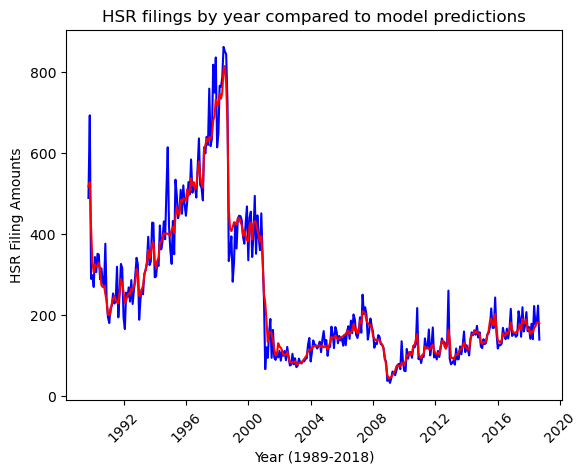

In [53]:
#Plot actual(blue) with predicted(red)
plt.plot(df['observation_date'], df['hsr_merger_filing_count'], label='Observed', color='blue')
plt.plot(df['observation_date'], df['predictions'], label='Predicted', color='red')
plt.title('HSR filings by year compared to model predictions')
plt.xlabel('Year (1989-2018)')
plt.xticks(rotation=45)
plt.ylabel('HSR Filing Amounts')
plt.show()

#Demonstrate the decision tree
model_access = model.named_steps['model']

plt.figure(figsize=(20, 12))
plt.title('Decision Tree Visualization')
plot_tree(model_access.estimators_[0], filled=True)
#plt.savefig('tree_plot.svg', format='svg', dpi=1200)
plt.show()

<h3>Linear Regression</h3>

In [54]:
from sklearn.linear_model import LinearRegression


In [55]:
df_ols = df = pd.read_excel('hsr_monthly.xlsx', header=0)
#df_ols = df_ols.drop(columns=['recession'])

In [56]:
X = df.drop(columns=['observation_date', 'year_num', 'month_num', 'hsr_merger_filing_count'])
Y = df['hsr_merger_filing_count']

In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.25, random_state=30
)

In [58]:
pipeline2 = Pipeline(
[
  #  ('scaler', StandardScaler()),
    ('model', LinearRegression())
]
)

In [59]:
model2 = GridSearchCV(
    estimator=pipeline2,
    param_grid={
   #     'scaler': [None],#, MinMaxScaler(), StandardScaler()],
        'model': [LinearRegression()]
    },
        n_jobs=-1,
        cv=5
)

In [60]:
model2.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', LinearRegression())]),
             n_jobs=-1, param_grid={'model': [LinearRegression()]})

In [61]:
model2 = model2.best_estimator_

In [62]:
print(df_ols.columns)

Index(['observation_date', 'year_num', 'month_num', 'PPI', 'fed_fund_rate',
       'm1_in_billions', 'unemployment_rate', 'population_in_thousands',
       '10_yr_mrkt_security_yield', 'CPI', 'recession',
       'hsr_merger_filing_count'],
      dtype='object')


In [63]:
#Compare test predictions with actual test numbers and get the r2 score
test_predictions = model2.predict(xtest)

print("Linear Regression Metrics")
score = r2_score(ytest, test_predictions)
MSE = mean_squared_error(ytest, test_predictions)
MAE  = mean_absolute_error(ytest, test_predictions)
print(f"R2 Score: {score}")
print(f"Mean Squared Error: {MSE}")
print(f"Mean Absolute Error: {MAE}\n\n")

test_df = pd.DataFrame()
test_df["True Values"] = ytest
test_df["Predictions"] = test_predictions
print(test_df)

Linear Regression Metrics
R2 Score: 0.5425815768824247
Mean Squared Error: 17023.3726297243
Mean Absolute Error: 93.09785003537758


     True Values  Predictions
329          146   161.328761
22           319   345.255026
238           77     2.268695
343          222   153.827418
314          157   139.879634
..           ...          ...
214          200   223.211076
20           228   340.849732
241          135    -6.630337
174          127   176.369492
64           326   385.984395

[87 rows x 2 columns]


In [64]:
#Add Prediction column
df_ols['predictions'] = model2.predict(X)

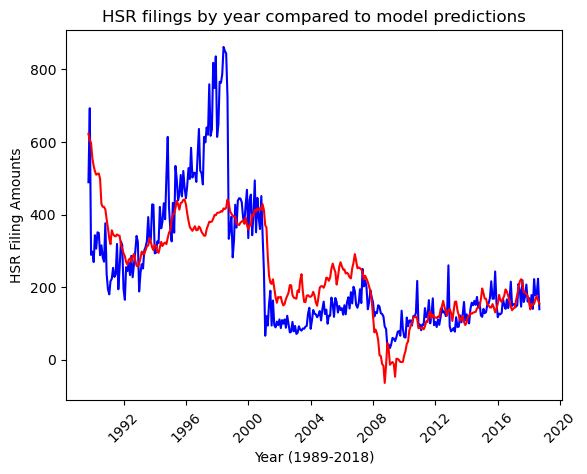

In [65]:
#Plot actual(blue) with predicted(red)
plt.plot(df_ols['observation_date'], df_ols['hsr_merger_filing_count'], label='Observed', color='blue')
plt.plot(df_ols['observation_date'], df_ols['predictions'], label='Predicted', color='red')
plt.title('HSR filings by year compared to model predictions')
plt.xlabel('Year (1989-2018)')
plt.xticks(rotation=45)
plt.ylabel('HSR Filing Amounts')
plt.show()

In [66]:
#Get Model Coefficients
coefs = model2.named_steps['model'].coef_
#print("Intercept ", model2.named_steps['model'].intercept_)
#print("Original Functioon ", coefs)
coefs = np.insert(coefs, 0, model2.named_steps['model'].intercept_)
#print("Altered Function ", coefs)
coefs_df = pd.DataFrame(coefs, columns=['coefficients'])
coefs_df['labels'] = ['intercept', 'PPI', 'fed_fund_rate', 'm1_in_billions', 'unemployment_rate', 'population_in_thousands', '10_yr_mrkt_security_yield', 'cpi', 'recession']
print(coefs_df)

   coefficients                     labels
0  -4017.130072                  intercept
1      6.201992                        PPI
2     47.359682              fed_fund_rate
3      0.131607             m1_in_billions
4     -4.629337          unemployment_rate
5      0.029953    population_in_thousands
6    -39.033410  10_yr_mrkt_security_yield
7    -29.334880                        cpi
8    -46.322843                  recession


<h3>Aggregate Metrics</h3>

In [67]:
#Metrics Dataframe
df_final = pd.read_excel('hsr_monthly.xlsx', header=0)
df_final.columns

Index(['observation_date', 'year_num', 'month_num', 'PPI', 'fed_fund_rate',
       'm1_in_billions', 'unemployment_rate', 'population_in_thousands',
       '10_yr_mrkt_security_yield', 'CPI', 'recession',
       'hsr_merger_filing_count'],
      dtype='object')

In [68]:
#Alter df
df_final_actual = df_final['hsr_merger_filing_count']
df_date_placeholder = df_final['observation_date']
df_final = df_final.drop(columns=['observation_date', 'year_num', 'month_num', 'hsr_merger_filing_count'])
df_final

,PPI,fed_fund_rate,m1_in_billions,unemployment_rate,population_in_thousands,10_yr_mrkt_security_yield,CPI,recession
0,112.8,8.84,786.6,5.3,248174,8.01,125.400,0
1,112.7,8.55,787.9,5.4,248380,7.87,125.900,0
2,113.0,8.45,792.9,5.4,248569,7.84,126.300,0
3,114.9,8.23,795.4,5.4,248743,8.21,127.500,0
4,114.4,8.24,798.1,5.3,248920,8.47,128.000,0
...,...,...,...,...,...,...,...,...
343,203.2,1.70,3654.0,3.8,328521,2.98,250.792,0
344,204.2,1.82,3655.6,4.0,328692,2.91,251.018,0
345,204.3,1.91,3681.5,3.8,328863,2.89,251.214,0
346,203.4,1.91,3695.0,3.8,329040,2.89,251.663,0


In [69]:
#Get predictions from each model
pred1 = model.predict(df_final)
pred2 = model2.predict(df_final)
df_final['etr predictions'] = pred1
df_final['linear predictions'] = pred2

In [70]:
#Aggregate Metrics for etr
score = r2_score(df_final_actual, pred1)
MSE = mean_squared_error(df_final_actual, pred1)
MAE  = mean_absolute_error(df_final_actual, pred1)
print('ETR metrics')
print(f"R2 Score: {score}")
print(f"Mean Squared Error: {MSE}")
print(f"Mean Absolute Error: {MAE}\n\n")

ETR metrics
R2 Score: 0.9570920272685618
Mean Squared Error: 1342.100879938454
Mean Absolute Error: 22.820818220523996




In [71]:
#Aggregate Metrics for linear regression
score2 = r2_score(df_final_actual, pred2)
MSE2 = mean_squared_error(df_final_actual, pred2)
MAE2  = mean_absolute_error(df_final_actual, pred2)
print('Linear Regression metrics')
print(f"R2 Score: {score2}")
print(f"Mean Squared Error: {MSE2}")
print(f"Mean Absolute Error: {MAE2}\n\n")

Linear Regression metrics
R2 Score: 0.5667261054935889
Mean Squared Error: 13552.196434704994
Mean Absolute Error: 81.02357799093458




In [72]:
#More alterations to dataframe
df_final['actual'] = df_final_actual
df_final['observation_date'] = df_date_placeholder
df_final

,PPI,fed_fund_rate,m1_in_billions,unemployment_rate,population_in_thousands,10_yr_mrkt_security_yield,CPI,recession,etr predictions,linear predictions,actual,observation_date
0,112.8,8.84,786.6,5.3,248174,8.01,125.400,0,517.823333,622.393590,489,1989-10-01
1,112.7,8.55,787.9,5.4,248380,7.87,125.900,0,527.718333,604.714784,693,1989-11-01
2,113.0,8.45,792.9,5.4,248569,7.84,126.300,0,415.937595,597.595606,289,1989-12-01
3,114.9,8.23,795.4,5.4,248743,8.21,127.500,0,330.888929,554.856874,298,1990-01-01
4,114.4,8.24,798.1,5.3,248920,8.47,128.000,0,305.664262,533.533293,269,1990-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...
343,203.2,1.70,3654.0,3.8,328521,2.98,250.792,0,167.951152,153.827418,222,2018-05-01
344,204.2,1.82,3655.6,4.0,328692,2.91,251.018,0,171.523485,166.221886,177,2018-06-01
345,204.3,1.91,3681.5,3.8,328863,2.89,251.214,0,180.625152,175.591924,180,2018-07-01
346,203.4,1.91,3695.0,3.8,329040,2.89,251.663,0,181.085152,163.917134,223,2018-08-01


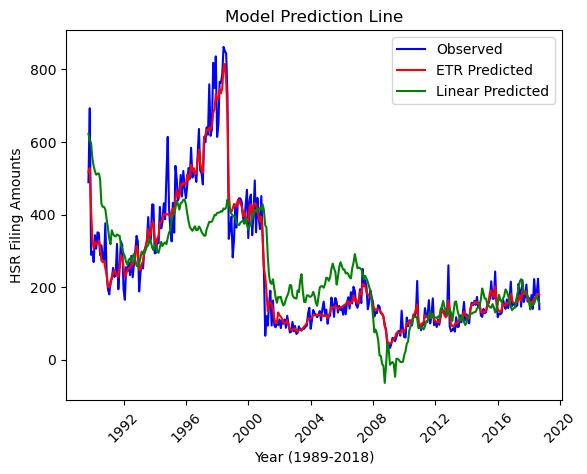

In [73]:
#Plot actual(blue) with etr(red) and linear (green)
plt.plot(df_final['observation_date'], df_final['actual'], label='Observed', color='blue')
plt.plot(df_final['observation_date'], df_final['etr predictions'], label='ETR Predicted', color='red')
plt.plot(df_final['observation_date'], df_final['linear predictions'], label='Linear Predicted', color='green')
plt.title('Model Prediction Line')
plt.xlabel('Year (1989-2018)')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('HSR Filing Amounts')
plt.show()

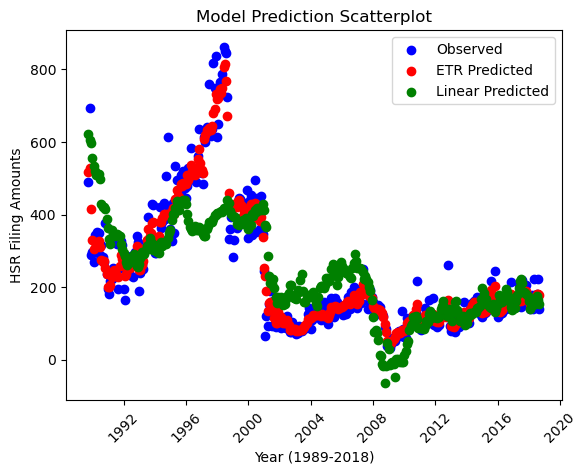

In [74]:
#Plot actual(blue) with etr(red) and linear (green)
plt.scatter(df_final['observation_date'], df_final['actual'], label='Observed', color='blue')
plt.scatter(df_final['observation_date'], df_final['etr predictions'], label='ETR Predicted', color='red')
plt.scatter(df_final['observation_date'], df_final['linear predictions'], label='Linear Predicted', color='green')
plt.title('Model Prediction Scatterplot')
plt.xlabel('Year (1989-2018)')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('HSR Filing Amounts')
plt.show()

<h3>Predictive analytics</h3>

In [75]:
#Create Dataframe and prepare for future predictions
df_predict = pd.read_excel('hsr_predictions.xlsx', header=0)
df_predict


,observation_date,year_num,month_num,PPI,fed_fund_rate,m1_in_billions,unemployment_rate,population_in_thousands,10_yr_mrkt_security_yield,CPI,recession,hsr_merger_filing_count
0,1989-10-01,1989,10,112.800,8.84,786.600,5.3,248174,8.01,125.400,0,489.0
1,1989-11-01,1989,11,112.700,8.55,787.900,5.4,248380,7.87,125.900,0,693.0
2,1989-12-01,1989,12,113.000,8.45,792.900,5.4,248569,7.84,126.300,0,289.0
3,1990-01-01,1990,1,114.900,8.23,795.400,5.4,248743,8.21,127.500,0,298.0
4,1990-02-01,1990,2,114.400,8.24,798.100,5.3,248920,8.47,128.000,0,269.0
...,...,...,...,...,...,...,...,...,...,...,...,...
408,2023-10-01,2023,10,255.192,5.33,18035.580,3.8,335773,4.80,307.531,0,NaN
409,2023-11-01,2023,11,252.856,5.33,18013.000,3.7,335925,4.50,308.024,0,NaN
410,2023-12-01,2023,12,249.849,5.33,18121.200,3.7,336070,4.02,308.742,0,NaN
411,2024-01-01,2024,1,251.250,5.33,18034.640,3.7,336194,4.06,309.685,0,NaN


In [76]:
temp = df_predict['month_num']
observation_date = df_predict['observation_date']
observation_year = df_predict['year_num']
df_predict  = df_predict.drop(columns=['observation_date', 'year_num', 'month_num'])
df_predict

,PPI,fed_fund_rate,m1_in_billions,unemployment_rate,population_in_thousands,10_yr_mrkt_security_yield,CPI,recession,hsr_merger_filing_count
0,112.800,8.84,786.600,5.3,248174,8.01,125.400,0,489.0
1,112.700,8.55,787.900,5.4,248380,7.87,125.900,0,693.0
2,113.000,8.45,792.900,5.4,248569,7.84,126.300,0,289.0
3,114.900,8.23,795.400,5.4,248743,8.21,127.500,0,298.0
4,114.400,8.24,798.100,5.3,248920,8.47,128.000,0,269.0
...,...,...,...,...,...,...,...,...,...
408,255.192,5.33,18035.580,3.8,335773,4.80,307.531,0,NaN
409,252.856,5.33,18013.000,3.7,335925,4.50,308.024,0,NaN
410,249.849,5.33,18121.200,3.7,336070,4.02,308.742,0,NaN
411,251.250,5.33,18034.640,3.7,336194,4.06,309.685,0,NaN


In [77]:
df_predict['ETR Predictions'] = model.predict(df_predict.drop(columns='hsr_merger_filing_count'))
df_predict['Observation Date'] = observation_date

In [78]:
df_unknown = df_predict[df_predict['hsr_merger_filing_count'].isna()]


In [79]:
import datetime

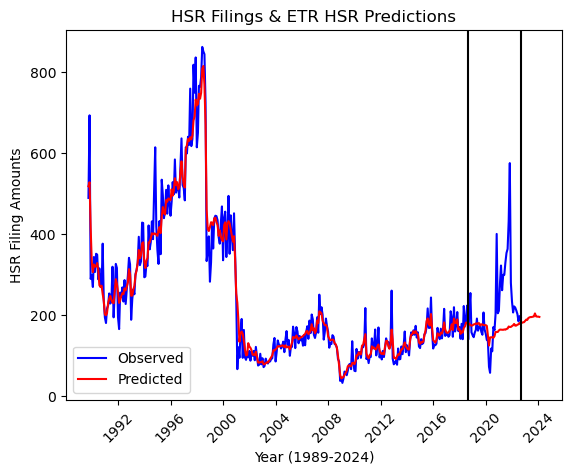

In [80]:
#Plot actual(blue) with predicted(red)
plt.plot(df_predict['Observation Date'], df_predict['hsr_merger_filing_count'], label='Observed', color='blue')
plt.plot(df_predict['Observation Date'], df_predict['ETR Predictions'], label='Predicted', color='red')
plt.axvline(datetime.datetime(2022, 9, 1), color='black')
plt.axvline(datetime.datetime(2018, 9, 1), color='black')
plt.title('HSR Filings & ETR HSR Predictions')
plt.legend(loc='lower left')
plt.xlabel('Year (1989-2024)')
plt.xticks(rotation=45)
plt.ylabel('HSR Filing Amounts')
plt.show()

In [81]:
print("Extra Trees Metrics")
df_predict = df_predict.dropna()
score = r2_score(df_predict['hsr_merger_filing_count'], df_predict['ETR Predictions'])
MSE = mean_squared_error(df_predict['hsr_merger_filing_count'], df_predict['ETR Predictions'])
MAE  = mean_absolute_error(df_predict['hsr_merger_filing_count'], df_predict['ETR Predictions'])
print(f"R2 Score: {score}")
print(f"Mean Squared Error: {MSE}")
print(f"Mean Absolute Error: {MAE}\n\n")

Extra Trees Metrics
R2 Score: 0.9117949973625806
Mean Squared Error: 2526.2782093459377
Mean Absolute Error: 28.369117917393446


